# Step 1. 준비하기

### 사진 준비하기.

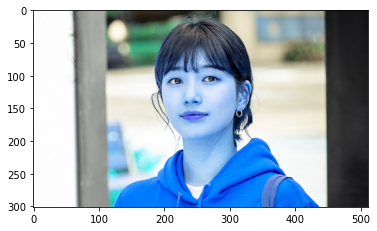

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

import os
my_image_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/image.png'
img_bgr = cv2.imread(my_image_path)    #- OpenCV로 이미지를 읽어서
img_bgr = cv2.resize(img_bgr, (512, 301))    # 512x301의 크기로 Resize
img_show = img_bgr.copy()      #- 출력용 이미지 별도 보관
plt.imshow(img_bgr)
plt.show()

### RGB로 바꾸기.

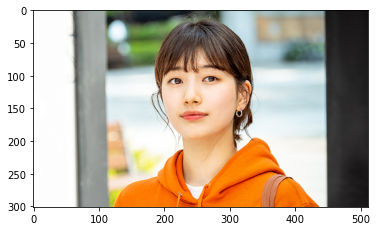

In [2]:
# plt.imshow 이전에 RGB 이미지로 바꾸는 것을 잊지마세요. 
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.show()

# Step 2. 얼굴 검출 & 랜드마크 검출 하기

### hog detector 선언하고  bounding box 추출하기.

In [3]:
import dlib
detector_hog = dlib.get_frontal_face_detector()   #- detector 선언

img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
dlib_rects = detector_hog(img_rgb, 1)   #- (image, num of img pyramid)


### 화면 출력!!! 짠!!

rectangles[[(182, 67) (311, 196)]]


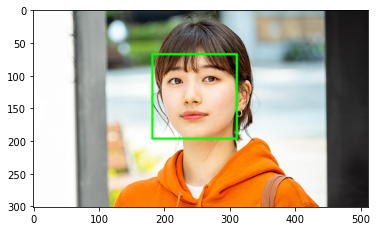

In [4]:
print(dlib_rects)   # 찾은 얼굴영역 좌표

for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

### landmark 모델불러오기.

In [5]:
import os
model_path = os.getenv('HOME')+'/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)

### landmark 출력하기.

In [6]:
list_landmarks = []
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

print(len(list_landmarks[0]))

68


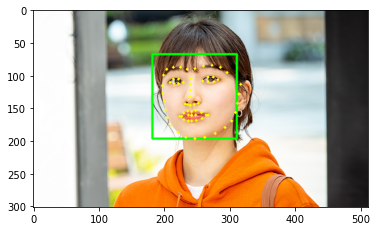

In [7]:
for landmark in list_landmarks:
    for idx, point in enumerate(list_points):
        cv2.circle(img_show, point, 2, (0, 255, 255), -1) # yellow

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

잘 되었구만 ㅎㅎㅎ

# Step 3. 스티커 적용 위치 확인하기

### 코의 중심점 찾기.

In [8]:
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    print (landmark[30]) # nose center index : 30
    x = landmark[30][0]
    y = landmark[30][1] - dlib_rect.width()//2
    w = dlib_rect.width()
    h = dlib_rect.width()
    print ('(x,y) : (%d,%d)'%(x,y))
    print ('(w,h) : (%d,%d)'%(w,h))

(239, 132)
(x,y) : (239,67)
(w,h) : (130,130)


### 스티커 이미지 resize.

In [9]:
import os
sticker_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/cat-whiskers.png'

img_sticker = cv2.imread(sticker_path)
img_sticker = cv2.resize(img_sticker, (w,h))

print (img_sticker.shape)

(130, 130, 3)


### x, y 좌표 조정.

In [10]:
refined_x = x - w// 2  # left
refined_y = y + h// 4  # top
print ('(x,y) : (%d,%d)'%(refined_x, refined_y))

(x,y) : (174,99)


In [11]:
img_sticker = img_sticker[-refined_y:]
print (img_sticker.shape)

(99, 130, 3)


# Step 4. 스티커 적용하기

### 원본 이미지에 스티커 적용!

In [12]:
sticker_area = img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)

### 결과 이미지 출력!

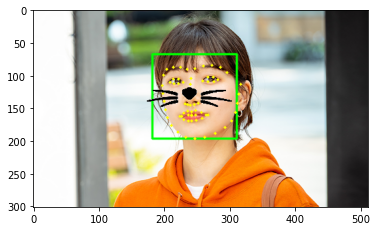

In [13]:
plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

### bounding box와 landmark 제거하기.

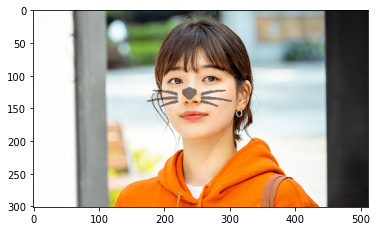

In [14]:
sticker_area = img_bgr[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_bgr[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
     cv2.addWeighted(sticker_area, 0.5, np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8), 0.5, 0)

plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()

# Step 5. 문제점 찾아보기

## 다른 각도 사진

찾은 얼굴영역 좌표 : rectangles[[(139, 139) (324, 325)]]


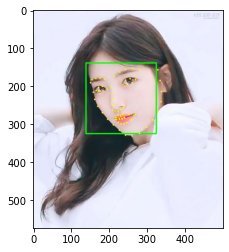

In [15]:
# 사진 준비하기.

my_image_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/image5.jpg'
img_bgr = cv2.imread(my_image_path)    #- OpenCV로 이미지를 읽어서
img_bgr = cv2.resize(img_bgr, (500, 574))    # 500x574의 크기로 Resize
img_show = img_bgr.copy()      #- 출력용 이미지 별도 보관

# RGB로 바꾸기.
# plt.imshow 이전에 RGB 이미지로 바꾸는 것을 잊지마세요. 
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

# hog detector 선언하고  bounding box 추출하기.
detector_hog = dlib.get_frontal_face_detector()   #- detector 선언

img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
dlib_rects = detector_hog(img_rgb, 1)   #- (image, num of img pyramid)

print("찾은 얼굴영역 좌표 :", dlib_rects)   # 찾은 얼굴영역 좌표

for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

# landmark 모델불러오기.
model_path = os.getenv('HOME')+'/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)

# landmark 출력하기.
list_landmarks = []
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

for landmark in list_landmarks:
    for idx, point in enumerate(list_points):
        cv2.circle(img_show, point, 2, (0, 255, 255), -1) # yellow

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

###### 사진 준비와 인식까지 성공ㅎㅎㅎ 이제 스티커를 붙여보자.

## 스티커 붙이기.

코의 중심 랜드마크 좌표 : (212, 251)
x,y의 좌표-> (x,y) : (119,176)
스티커 이미지 크기 : (176, 186, 3)


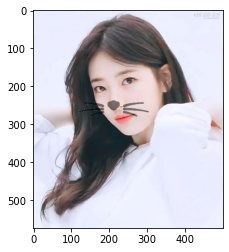

In [16]:
# 코의 중심점 찾기.
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    print ("코의 중심 랜드마크 좌표 :" ,landmark[30]) # nose center index : 30
    x = landmark[30][0]
    y = landmark[30][1] - dlib_rect.width()//2
    w = dlib_rect.width()
    h = dlib_rect.width()
    
# 스티커 이미지 resize.
sticker_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/cat-whiskers.png'
img_sticker = cv2.imread(sticker_path)
img_sticker = cv2.resize(img_sticker, (w,h))

# x, y 좌표 조정.
refined_x = x - w// 2  # left
refined_y = y + h// 10  # top
print ("x,y의 좌표->", '(x,y) : (%d,%d)'%(refined_x, refined_y))

img_sticker = img_sticker[-refined_y:]
print ("스티커 이미지 크기 :", img_sticker.shape)

#이미지 출력!
sticker_area = img_bgr[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_bgr[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
     cv2.addWeighted(sticker_area, 0.5, np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8), 0.5, 0)

plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()

### 너무 예뻐서 스티커 적용하고 어색함을 찾기 오래걸렸넹ㅋㅋㅋㅋ<br>얼굴 각도가 측면이다보니 고양이 수염이 잘 맞지 않는다....

##  옆모습 사진

찾은 얼굴영역 좌표 : rectangles[[(291, 217) (513, 440)]]


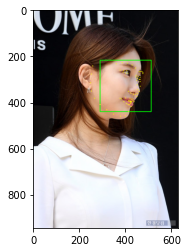

In [17]:
# 사진 준비하기.

my_image_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/image2.jpg'
img_bgr = cv2.imread(my_image_path)    #- OpenCV로 이미지를 읽어서
img_bgr = cv2.resize(img_bgr, (630, 945))    # 630x945의 크기로 Resize
img_show = img_bgr.copy()      #- 출력용 이미지 별도 보관

# RGB로 바꾸기.
# plt.imshow 이전에 RGB 이미지로 바꾸는 것을 잊지마세요. 
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

# hog detector 선언하고  bounding box 추출하기.
detector_hog = dlib.get_frontal_face_detector()   #- detector 선언

img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
dlib_rects = detector_hog(img_rgb, 1)   #- (image, num of img pyramid)

print("찾은 얼굴영역 좌표 :", dlib_rects)   # 찾은 얼굴영역 좌표

for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

# landmark 모델불러오기.
model_path = os.getenv('HOME')+'/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)

# landmark 출력하기.
list_landmarks = []
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

for landmark in list_landmarks:
    for idx, point in enumerate(list_points):
        cv2.circle(img_show, point, 2, (0, 255, 255), -1) # yellow

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

## 스티커 붙이기.

코의 중심 랜드마크 좌표 : (455, 345)
x,y의 좌표-> (x,y) : (344,249)
스티커 이미지 크기 : (223, 223, 3)


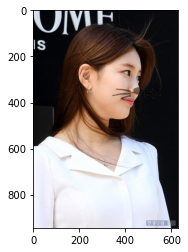

In [18]:
# 코의 중심점 찾기.
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    print ("코의 중심 랜드마크 좌표 :", landmark[30]) # nose center index : 30
    x = landmark[30][0]
    y = landmark[30][1] - dlib_rect.width()//2
    w = dlib_rect.width()
    h = dlib_rect.width()
    
# 스티커 이미지 resize.
sticker_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/cat-whiskers.png'
img_sticker = cv2.imread(sticker_path)
img_sticker = cv2.resize(img_sticker, (w,h))

# x, y 좌표 조정.
refined_x = x - w// 2  # left
refined_y = y + h// 14  # top
print ("x,y의 좌표->", '(x,y) : (%d,%d)'%(refined_x, refined_y))

img_sticker = img_sticker[-refined_y:]
print ("스티커 이미지 크기 :", img_sticker.shape)

#이미지 출력!
sticker_area = img_bgr[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_bgr[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
     cv2.addWeighted(sticker_area, 0.5, np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8), 0.5, 0)

plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()

### 위 사진과 마찬가지로 옆모습이다보니 수염 사진이 많이 어색하다. 사진 얼굴 각도에 따라 수염 사진의 각도도 조정해야 할 것 같다.

##  밝기 조절 사진

찾은 얼굴영역 좌표 : rectangles[[(182, 67) (311, 196)]]


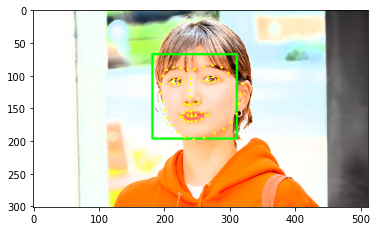

In [19]:
# 사진 준비하기.

my_image_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/image3.png'
img_bgr = cv2.imread(my_image_path)    #- OpenCV로 이미지를 읽어서
img_bgr = cv2.resize(img_bgr, (512, 301))    # 512x301의 크기로 Resize
img_show = img_bgr.copy()      #- 출력용 이미지 별도 보관

# RGB로 바꾸기.
# plt.imshow 이전에 RGB 이미지로 바꾸는 것을 잊지마세요. 
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

# hog detector 선언하고  bounding box 추출하기.
detector_hog = dlib.get_frontal_face_detector()   #- detector 선언

img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
dlib_rects = detector_hog(img_rgb, 1)   #- (image, num of img pyramid)

print("찾은 얼굴영역 좌표 :", dlib_rects)   # 찾은 얼굴영역 좌표

for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

# landmark 모델불러오기.
model_path = os.getenv('HOME')+'/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)

# landmark 출력하기.
list_landmarks = []
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

for landmark in list_landmarks:
    for idx, point in enumerate(list_points):
        cv2.circle(img_show, point, 2, (0, 255, 255), -1) # yellow

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

코의 중심 랜드마크 좌표 : (239, 132)
x,y의 좌표-> (x,y) : (174,99)
스티커 이미지 크기 : (99, 130, 3)


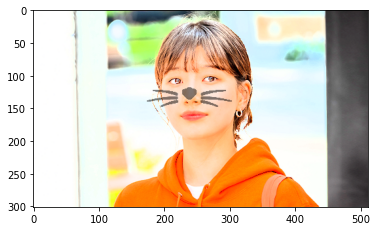

In [20]:
# 코의 중심점 찾기.
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    print ("코의 중심 랜드마크 좌표 :", landmark[30]) # nose center index : 30
    x = landmark[30][0]
    y = landmark[30][1] - dlib_rect.width()//2
    w = dlib_rect.width()
    h = dlib_rect.width()
    
# 스티커 이미지 resize.
sticker_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/cat-whiskers.png'
img_sticker = cv2.imread(sticker_path)
img_sticker = cv2.resize(img_sticker, (w,h))

# x, y 좌표 조정.
refined_x = x - w// 2  # left
refined_y = y + h// 4  # top
print ("x,y의 좌표->", '(x,y) : (%d,%d)'%(refined_x, refined_y))

img_sticker = img_sticker[-refined_y:]
print ("스티커 이미지 크기 :", img_sticker.shape)

#이미지 출력!
sticker_area = img_bgr[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_bgr[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
     cv2.addWeighted(sticker_area, 0.5, np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8), 0.5, 0)

plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()

### 밝기 조절한 사진에도 잘 맞는 모습이다.

##  인물이 두 명 일때의 사진

찾은 얼굴영역 좌표 : rectangles[[(175, 26) (227, 78)], [(607, 49) (659, 101)]]


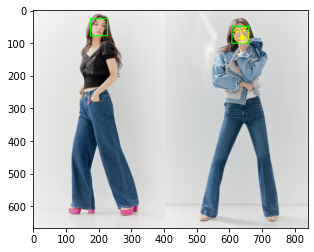

In [21]:
# 사진 준비하기.

my_image_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/image6.png'
img_bgr = cv2.imread(my_image_path)    #- OpenCV로 이미지를 읽어서
img_bgr = cv2.resize(img_bgr, (840, 666))    # 840x660의 크기로 Resize
img_show = img_bgr.copy()      #- 출력용 이미지 별도 보관

# RGB로 바꾸기.
# plt.imshow 이전에 RGB 이미지로 바꾸는 것을 잊지마세요. 
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

# hog detector 선언하고  bounding box 추출하기.
detector_hog = dlib.get_frontal_face_detector()   #- detector 선언

img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
dlib_rects = detector_hog(img_rgb, 1)   #- (image, num of img pyramid)

print("찾은 얼굴영역 좌표 :", dlib_rects)   # 찾은 얼굴영역 좌표

for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

# landmark 모델불러오기.
model_path = os.getenv('HOME')+'/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)

# landmark 출력하기.
list_landmarks = []
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

for landmark in list_landmarks:
    for idx, point in enumerate(list_points):
        cv2.circle(img_show, point, 2, (0, 255, 255), -1) # yellow
        



img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

### 두개의 얼굴이 있는 사진에 적용해 보았더니... 두 얼굴 전부 얼굴 인식에 성공은 하였지만, 랜드마크 좌표는 오른쪽 사진에만 적용되었다.

## 스티커 붙이기.

코의 중심 랜드마크 좌표 : (204, 55)
코의 중심 랜드마크 좌표 : (637, 75)
x,y의 좌표-> (x,y) : (611,54)
스티커 이미지 크기 : (53, 53, 3)


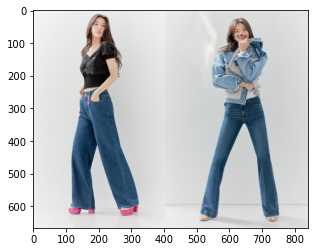

In [22]:
# 코의 중심점 찾기.
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    print ("코의 중심 랜드마크 좌표 :", landmark[30]) # nose center index : 30
    x = landmark[30][0]
    y = landmark[30][1] - dlib_rect.width()//2
    w = dlib_rect.width()
    h = dlib_rect.width()
    
# 스티커 이미지 resize.
sticker_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/cat-whiskers.png'
img_sticker = cv2.imread(sticker_path)
img_sticker = cv2.resize(img_sticker, (w,h))

# x, y 좌표 조정.
refined_x = x - w// 2  # left
refined_y = y + h// 10  # top
print ("x,y의 좌표->", '(x,y) : (%d,%d)'%(refined_x, refined_y))

img_sticker = img_sticker[-refined_y:]
print ("스티커 이미지 크기 :", img_sticker.shape)

#이미지 출력!
sticker_area = img_bgr[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_bgr[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
     cv2.addWeighted(sticker_area, 0.5, np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8), 0.5, 0)

plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()

### 랜드마크가 오른쪽에만 적용되었기에 스티커 또한 오른쪽에만 붙었다. 왼쪽에도 적용시키려면 어찌해야할까??

## 흑백사진

### 조원 분들께서 흑백사진은 안된다는 이야기를 하셔서 한번 시도해보았다.

찾은 얼굴영역 좌표 : rectangles[[(161, 247) (546, 632)]]


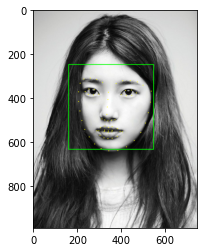

In [23]:
# 사진 준비하기.

my_image_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/image7.jpg'
img_bgr = cv2.imread(my_image_path)    #- OpenCV로 이미지를 읽어서
img_bgr = cv2.resize(img_bgr, (743, 990))    # 743x990의 크기로 Resize
img_show = img_bgr.copy()      #- 출력용 이미지 별도 보관

# RGB로 바꾸기.
# plt.imshow 이전에 RGB 이미지로 바꾸는 것을 잊지마세요. 
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

# hog detector 선언하고  bounding box 추출하기.
detector_hog = dlib.get_frontal_face_detector()   #- detector 선언

img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
dlib_rects = detector_hog(img_rgb, 1)   #- (image, num of img pyramid)

print("찾은 얼굴영역 좌표 :", dlib_rects)   # 찾은 얼굴영역 좌표

for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

# landmark 모델불러오기.
model_path = os.getenv('HOME')+'/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)

# landmark 출력하기.
list_landmarks = []
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

for landmark in list_landmarks:
    for idx, point in enumerate(list_points):
        cv2.circle(img_show, point, 2, (0, 255, 255), -1) # yellow
        



img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

##### 랜드마크가 적용이 된건가? 흑백사진이라 그런지 연하다..... 일단 스티커 붙여보자.

코의 중심 랜드마크 좌표 : (334, 474)
x,y의 좌표-> (x,y) : (141,336)
스티커 이미지 크기 : (336, 386, 3)


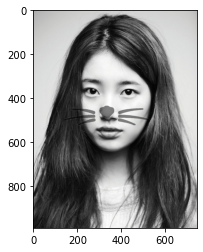

In [24]:
# 코의 중심점 찾기.
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    print ("코의 중심 랜드마크 좌표 :", landmark[30]) # nose center index : 30
    x = landmark[30][0]
    y = landmark[30][1] - dlib_rect.width()//2
    w = dlib_rect.width()
    h = dlib_rect.width()
    
# 스티커 이미지 resize.
sticker_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/cat-whiskers.png'
img_sticker = cv2.imread(sticker_path)
img_sticker = cv2.resize(img_sticker, (w,h))

# x, y 좌표 조정.
refined_x = x - w// 2  # left
refined_y = y + h// 7  # top
print ("x,y의 좌표->", '(x,y) : (%d,%d)'%(refined_x, refined_y))

img_sticker = img_sticker[-refined_y:]
print ("스티커 이미지 크기 :", img_sticker.shape)

#이미지 출력!
sticker_area = img_bgr[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_bgr[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
     cv2.addWeighted(sticker_area, 0.5, np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8), 0.5, 0)

plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()

#### 흑백사진도 문제 없구만...ㅎㅎㅎ

# 회전한 사진에 적용해보자.

## 90도 회전 사진.

찾은 얼굴영역 좌표 : rectangles[]


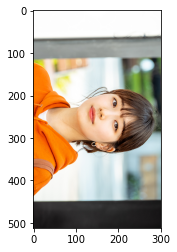

In [25]:
# 사진 준비하기.

my_image_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/image8.png'
img_bgr = cv2.imread(my_image_path)    #- OpenCV로 이미지를 읽어서
img_bgr = cv2.resize(img_bgr, (301, 512))    # 301x512의 크기로 Resize
img_show = img_bgr.copy()      #- 출력용 이미지 별도 보관

# RGB로 바꾸기.
# plt.imshow 이전에 RGB 이미지로 바꾸는 것을 잊지마세요. 
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

# hog detector 선언하고  bounding box 추출하기.
detector_hog = dlib.get_frontal_face_detector()   #- detector 선언

img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
dlib_rects = detector_hog(img_rgb, 1)   #- (image, num of img pyramid)

print("찾은 얼굴영역 좌표 :", dlib_rects)   # 찾은 얼굴영역 좌표

for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)
    
    

    
# landmark 모델불러오기.
model_path = os.getenv('HOME')+'/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)

# landmark 출력하기.
list_landmarks = []
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

for landmark in list_landmarks:
    for idx, point in enumerate(list_points):
        cv2.circle(img_show, point, 2, (0, 255, 255), -1) # yellow


img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

### 얼굴 영역 좌표를 못 구하는 걸 보니 인식에 실패한 것을 알 수 있다. 랜드마크 역시 구해지지 않았다.

## 180도 회전 사진.

찾은 얼굴영역 좌표 : rectangles[]


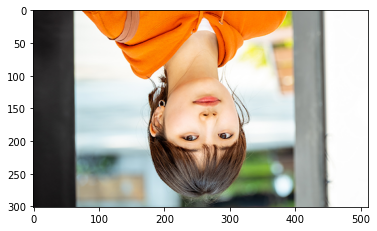

In [26]:
# 사진 준비하기.

my_image_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/image9.png'
img_bgr = cv2.imread(my_image_path)    #- OpenCV로 이미지를 읽어서
img_bgr = cv2.resize(img_bgr, (512, 301))    # 512x301의 크기로 Resize
img_show = img_bgr.copy()      #- 출력용 이미지 별도 보관

# RGB로 바꾸기.
# plt.imshow 이전에 RGB 이미지로 바꾸는 것을 잊지마세요. 
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

# hog detector 선언하고  bounding box 추출하기.
detector_hog = dlib.get_frontal_face_detector()   #- detector 선언

img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
dlib_rects = detector_hog(img_rgb, 1)   #- (image, num of img pyramid)

print("찾은 얼굴영역 좌표 :", dlib_rects)   # 찾은 얼굴영역 좌표

for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)
   
# landmark 모델불러오기.
model_path = os.getenv('HOME')+'/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)

# landmark 출력하기.
list_landmarks = []
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

for landmark in list_landmarks:
    for idx, point in enumerate(list_points):
        cv2.circle(img_show, point, 2, (0, 255, 255), -1) # yellow
        

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

### 역시나 마찬가지 얼굴 영역 구하기에 실패하였다.

# 총평
 - 수염 스티커의 각도를 이미지 각도에 맞출 수 있다면 완성도가 더 높아질 것이다.
 - 매 사진마다 길게 코드를 작성했는데 for 문이나 다른 함수들을 사용한다면 더 간단하고 쉽게 프로젝트를 진행할 수 있었을 것 같다.
 - 결론 : 파이썬 공부를 더 열심히 하자ㅋㅋㅋ